#Self Organizing Map

##Install MiniSom Package

In [7]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10613 sha256=6e034815a211d0c6894419d788e86bcd4f9225d6ad5cb0772446fed3f281ae62
  Stored in directory: c:\users\manasvi\appdata\local\pip\cache\wheels\b4\aa\7a\d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


### Importing the libraries


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [9]:
X.shape

(690, 15)

##Training the SOM


In [8]:
from minisom import MiniSom

In [11]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [12]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


In [13]:
from pylab import bone, pcolor, colorbar, plot, show

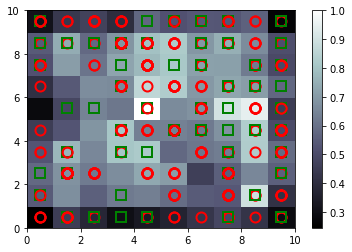

In [19]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgewidth = 2
        )

## Finding the frauds


##Printing the Fraunch Clients

In [22]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(6,
              5): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
                     0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.59042402, 1.        , 0.20556391, 0.44642857, 0.5       ,
                     0.38461538, 0.5       , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.36      , 0.        ]), array([0.89857005, 1. 

In [29]:
frauds = np.concatenate((mappings[(8,1)], mappings[(4,5)]), axis = 0)
frauds

array([[8.07451277e-01, 0.00000000e+00, 5.42556391e-01, 4.85178571e-01,
        5.00000000e-01, 2.30769231e-01, 8.75000000e-01, 2.98245614e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [6.99850638e-01, 0.00000000e+00, 5.30075188e-01, 5.35714286e-02,
        5.00000000e-01, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 5.00000000e-02, 2.70000000e-04],
       [6.01423944e-01, 0.00000000e+00, 2.67969925e-01, 1.25000000e-01,
        5.00000000e-01, 7.69230769e-02, 3.75000000e-01, 1.05263158e-01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 1.50000000e-01, 0.00000000e+00],
       [8.11391548e-01, 0.00000000e+00, 4.14736842e-01, 3.57142857e-02,
        5.00000000e-01, 1.53846154e-01, 5.00000000e-01, 7.89473684e-02,
        1.00000000e+00, 0.00000000e+0

In [30]:
frauds = sc.inverse_transform(frauds)

In [31]:
frauds

array([[1.5767358e+07, 0.0000000e+00, 4.9830000e+01, 1.3585000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5740487e+07, 0.0000000e+00, 4.9000000e+01, 1.5000000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 2.8000000e+01],
       [1.5715907e+07, 0.0000000e+00, 3.1570000e+01, 3.5000000e+00,
        2.0000000e+00, 2.0000000e+00, 4.0000000e+00, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.0000000e+02, 1.0000000e+00],
       [1.5768342e+07, 0.0000000e+00, 4.1330000e+01, 1.0000000e+00,
        2.0000000e+00, 3.0000000e+00, 5.0000000e+00, 2.2500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,